In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv', delimiter=',')

In [5]:
wine.head()

,fixed acidity,velatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.4,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 12 columns):
fixed acidity           3240 non-null float64
velatile acidity        3240 non-null float64
citric acid             3240 non-null float64
residual sugar          3240 non-null float64
chlorides               3240 non-null float64
free sulfur dioxide     3240 non-null int64
total sulfur dioxide    3240 non-null int64
density                 3240 non-null float64
pH                      3240 non-null float64
sulphates               3240 non-null float64
alcohol                 3240 non-null float64
quality                 3240 non-null int64
dtypes: float64(9), int64(3)
memory usage: 303.8 KB


In [7]:
wine.isnull()

,fixed acidity,velatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
wine.isnull().sum()

fixed acidity           0
velatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Preprocessing Data

In [9]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [10]:
wine['quality']
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [11]:
label_quality = LabelEncoder()

In [12]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [13]:
wine.head()

,fixed acidity,velatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.4,0.092,15,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0


In [14]:
wine['quality'].value_counts()

0    2610
1     630
Name: quality, dtype: int64

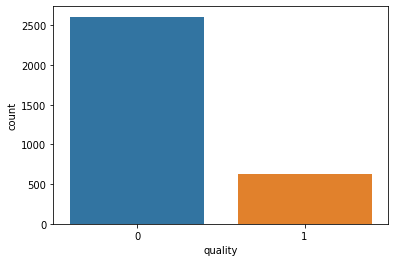

In [15]:
sns.countplot(wine['quality'])

### Now seperate the dataset as response variable and feature variables

In [16]:
X = wine.drop('quality', axis=1)

In [17]:
y = wine['quality']

In [18]:
y

0       0
1       0
2       0
3       0
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3210    0
3211    1
3212    1
3213    0
3214    0
3215    0
3216    0
3217    0
3218    0
3219    0
3220    1
3221    1
3222    0
3223    0
3224    0
3225    0
3226    0
3227    0
3228    0
3229    1
3230    1
3231    0
3232    0
3233    0
3234    0
3235    0
3236    0
3237    0
3238    0
3239    1
Name: quality, Length: 3240, dtype: int64

### Train and Test Splitting of data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

,fixed acidity,velatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
684,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1414,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
610,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0
1947,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
263,7.8,0.76,0.04,2.4,0.092,15,54,0.9970,3.26,0.65,9.8
3040,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0
2086,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0
1778,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4
448,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0
2759,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4


### Applying Standard scaling to get optimized result

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Random Forst Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)

In [22]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [23]:
pred_rfc

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

### Let's see how our model Performs

In [24]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       513
           1       0.86      0.99      0.92       135

    accuracy                           0.97       648
   macro avg       0.93      0.98      0.95       648
weighted avg       0.97      0.97      0.97       648



NameError: name 'pred_clf' is not defined

# SVM Classifier

In [25]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [26]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       513
           1       0.86      0.99      0.92       135

    accuracy                           0.97       648
   macro avg       0.93      0.98      0.95       648
weighted avg       0.97      0.97      0.97       648

[[492  21]
 [  1 134]]


# Neural Network

In [27]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)

In [28]:
mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(11, 11, 11), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
pred_mlpc = mlpc.predict(X_test)

In [30]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       513
           1       0.86      0.99      0.92       135

    accuracy                           0.97       648
   macro avg       0.93      0.98      0.95       648
weighted avg       0.97      0.97      0.97       648

[[492  21]
 [  1 134]]


In [31]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.9660493827160493

In [32]:
wine.head(10)

,fixed acidity,velatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.4,0.092,15,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.39,0.57,9.5,0
9,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0


In [33]:
Xnew = [[7.3, 0.65, 0, 1.2, 0.065, 15, 21, 0.9946, 3.39, 0.47, 10]]

In [34]:
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([1])